In [ ]:
%matplotlib inline
import numpy as np
from sklearn import datasets
from sklearn import model_selection
import matplotlib.pyplot as plt
import pdb
import torch

## 1- Coding a Multi-Layer Perceptron from scratch.

### 1. Implement basic utility functions

In this section, you will implement key functions required to build and train a Multi-Layer Perceptron (MLP) from scratch.

- `F_standardize`: Normalize your dataset (zero mean, unit variance)
- `F_sigmoid`: Implement the sigmoid activation function
- `F_relu` and `F_drelu`: Implement the ReLU activation and its derivative
- `F_computeCost`: Compute the total loss over all samples
- `F_computeAccuracy`: Compute the prediction accuracy (in percent)

These utility functions will be used later in the MLP class.


In [ ]:
def F_standardize(X):
    """
    standardize X, i.e. subtract mean (over data) and divide by standard-deviation (over data)
    Parameters
    ----------
    X: np.array of size (nbData, nbDim)
        matrix containing the observation data
    Returns
    -------
    X: np.array of size (nbData, nbDim)
        standardize version of X
    """

    X -= np.mean(X, axis=0, keepdims=True)
    X /= (np.std(X, axis=0, keepdims=True) + 1e-16)
    return X

def F_sigmoid(x):
    """Compute the value of the sigmoid activation function"""
    # TODO
    return 1 / (1 + np.exp(-x))

def F_relu(x):
    """Compute the value of the Rectified Linear Unit activation function"""
    # TODO
    return np.maximum(0, x)

def F_dRelu(x):
    """Compute the derivative of the Rectified Linear Unit activation function"""
    # TODO
    return (x > 0).astype(float)

def F_computeCost(hat_y,y):
    """Compute the cost (sum of the losses)"""
    # TODO
    epsilon = 1e-9
    cost = -np.sum(y * np.log(hat_y + epsilon) + (1 - y) * np.log(1 - hat_y + epsilon))
    return cost

def F_computeAccuracy(hat_y,y):
    """Compute the accuracy (in percents)"""
    # TODO
    predicted_labels = (hat_y > 0.5).astype(int)
    accuracy = np.mean(predicted_labels == y.reshape(predicted_labels.shape)) * 100
    return accuracy

### 2. Prepare the dataset

- Standardize the dataset using `F_standardize` function.
- Split the dataset into training and test sets.
- Reshape the data to match the expected input/output shape of your neural network.

Make sure your data has the correct shape:
- Input shape: `(n_features, n_examples)`
- Output shape: `(1, n_examples)`


In [ ]:
X, y = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)

print("Initial X.shape: {}".format(X.shape))
print("Initial y.shape: {}".format(y.shape))
print("Classes: {}".format(set(y)))

# X is (nbExamples, nbDim)
# y is (nbExamples,)

# Standardize data
X = F_standardize(X)

# Split between training set and test set
# TODO
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to proper shape: (nbExamples, nbDim) -> (nbDim, nbExamples)
X_train = X_train.T
X_test = X_test.T

# Convert to proper shape: (nbExamples,) -> (1, nbExamples)
y_train = y_train.reshape(1, len(y_train))
y_test = y_test.reshape(1, len(y_test))

n_in = X_train.shape[0]
n_out = 1

print("\n--- After Reshaping ---")
print("X_train.shape: {}".format(X_train.shape))
print("X_test.shape: {}".format(X_test.shape))
print("y_train.shape: {}".format(y_train.shape))
print("y_test.shape: {}".format(y_test.shape))
print("n_in: {} n_out: {}".format(n_in, n_out))

Initial X.shape: (1000, 2)
Initial y.shape: (1000,)
Classes: {np.int64(0), np.int64(1)}

--- After Reshaping ---
X_train.shape: (2, 800)
X_test.shape: (2, 200)
y_train.shape: (1, 800)
y_test.shape: (1, 200)
n_in: 2 n_out: 1


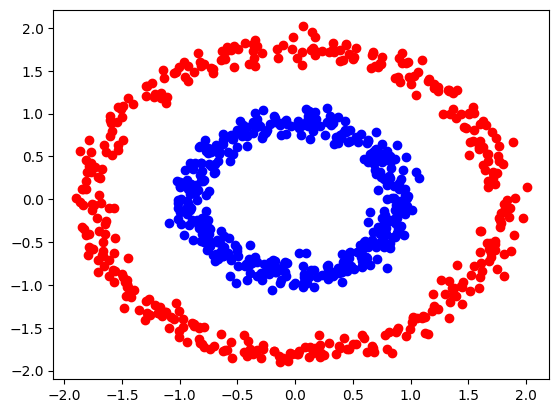

In [ ]:
# plot data
plt.scatter(X_train[0,np.ravel(y_train==0)],X_train[1,np.ravel(y_train==0)],color='r')
plt.scatter(X_train[0,np.ravel(y_train==1)],X_train[1,np.ravel(y_train==1)],color='b')

### 3. Implement the MLP class

In this section, you will define a `C_MultiLayerPerceptron` class that represents a basic feedforward neural network with:
- One hidden layer
- ReLU activation in the hidden layer
- Softmax (or sigmoid) activation in the output layer (depending on task)

You must implement the following:
- Weight and bias initialization in `__init__`
- Forward propagation logic in `forward_propagation`
- Backpropagation in `backward_propagation`
- Parameter updates using gradient descent in `update_parameters`

Follow the diagram above for the flow of data through the network.





![Model Diagram](MLP.png)



In [ ]:
class C_MultiLayerPerceptron:
    """
    A class used to represent a Multi-Layer Perceptron with 1 hidden layer.

    ...

    Attributes
    ----------
    W1, b1, W2, b2:
        weights and biases to be learnt
    Z1, A1, Z2, A2:
        values of the internal neurons to be used for backpropagation
    dW1, db1, dW2, db2:
        partial derivatives of the loss w.r.t. parameters

    Methods
    -------
    M_forwardPropagation
        Computes the forward pass of the network.
    M_backwardPropagation
        Computes the backward pass to calculate gradients.
    M_gradientDescent
        Updates the network parameters.
    """

    W1, b1, W2, b2 = [], [], [], []
    Z1, A1, Z2, A2 = [], [], [], []
    dW1, db1, dW2, db2 = [], [], [], []
    dZ1, dA1, dZ2 = [], [], []

    def __init__(self, n_in, n_h, n_out):
        """Initialise weight and biases parameters."""
        # TODO
        self.W1 = np.random.randn(n_h, n_in) * 0.01
        self.b1 = np.zeros((n_h, 1))
        self.W2 = np.random.randn(n_out, n_h) * 0.01
        self.b2 = np.zeros((n_out, 1))


    def M_forwardPropagation(self, X):
        """Forward propagation in the MLP

        Parameters
        ----------
        X: numpy array (nbDim, nbData)
            observation data
        Return
        ------
        hat_y: numpy array (1, nbData)
            predicted value by the MLP
        """
        # TODO
        self.Z1 = np.dot(self.W1, X) + self.b1
        self.A1 = F_relu(self.Z1)


        self.Z2 = np.dot(self.W2, self.A1) + self.b2
        self.A2 = F_sigmoid(self.Z2)

        hat_y = self.A2
        return hat_y


    def M_backwardPropagation(self, X, y):
        """Backward propagation in the MLP

        Parameters
        ----------
        X: numpy array (nbDim, nbData)
            observation data
        y: numpy array (1, nbData)
            ground-truth class to predict
        """
        # TODO
        m = X.shape[1]

        self.dZ2 = self.A2 - y

        self.dW2 = (1/m) * np.dot(self.dZ2, self.A1.T)

        self.db2 = (1/m) * np.sum(self.dZ2, axis=1, keepdims=True)
        self.dA1 = np.dot(self.W2.T, self.dZ2)
        self.dZ1 = self.dA1 * F_dRelu(self.Z1) 

        self.dW1 = (1/m) * np.dot(self.dZ1, X.T)

        self.db1 = (1/m) * np.sum(self.dZ1, axis=1, keepdims=True)


    def M_gradientDescent(self, alpha):
        """Update the parameters of the network using gradient descent

        Parameters
        ----------
        alpha: float scalar
            amount of update at each step of the gradient descent (learning rate)
        """
        # TODO
        self.W1 = self.W1 - alpha * self.dW1
        self.b1 = self.b1 - alpha * self.db1
        self.W2 = self.W2 - alpha * self.dW2
        self.b2 = self.b2 - alpha * self.db2

### 4. Train and evaluate the MLP

You are now ready to train your multi-layer perceptron.

- Instantiate the `C_MultiLayerPerceptron` class with the correct input, hidden, and output sizes.
- Implement the training loop over a fixed number of epochs.
- In each epoch, perform:
  - Forward propagation on the training and test data
  - Backward propagation on the training data
  - Parameter update using gradient descent
  - Logging of training and test loss and accuracy

Finally, display the evolution of train/test loss and accuracy to evaluate the performance of your network.


Epoch 0: Train Cost=554.5227, Train Acc=50.38%, Test Cost=138.6334, Test Acc=48.00%
Epoch 100: Train Cost=554.3192, Train Acc=50.50%, Test Cost=138.6799, Test Acc=48.00%
Epoch 200: Train Cost=553.7263, Train Acc=50.50%, Test Cost=138.5726, Test Acc=48.00%
Epoch 300: Train Cost=551.1662, Train Acc=65.62%, Test Cost=138.0885, Test Acc=59.50%
Epoch 400: Train Cost=541.5394, Train Acc=61.75%, Test Cost=136.2735, Test Acc=60.00%
Epoch 500: Train Cost=515.4873, Train Acc=72.75%, Test Cost=131.1673, Test Acc=70.50%
Epoch 600: Train Cost=466.9108, Train Acc=75.12%, Test Cost=121.0524, Test Acc=68.00%
Epoch 700: Train Cost=399.8576, Train Acc=89.25%, Test Cost=105.6939, Test Acc=82.50%
Epoch 800: Train Cost=318.4568, Train Acc=96.25%, Test Cost=83.7219, Test Acc=95.00%
Epoch 900: Train Cost=247.5789, Train Acc=99.38%, Test Cost=63.3594, Test Acc=99.50%
Epoch 1000: Train Cost=198.1336, Train Acc=99.62%, Test Cost=49.7879, Test Acc=100.00%
Epoch 1100: Train Cost=163.6446, Train Acc=99.88%, Test C

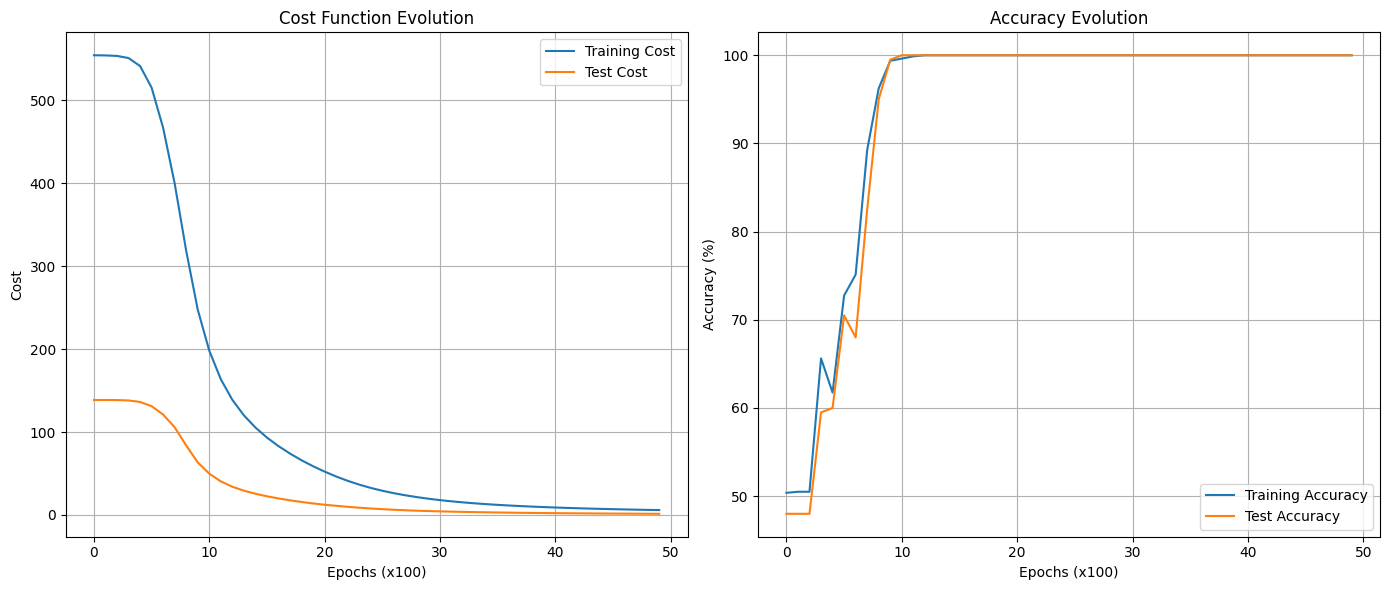


--- Final Performance ---
Final Training Accuracy: 100.00%
Final Test Accuracy: 100.00%


In [ ]:

n_hidden = 10
num_epoch = 5000
learning_rate = 0.1
myMLP = C_MultiLayerPerceptron(n_in, n_hidden, n_out)


train_cost, train_accuracy, test_cost, test_accuracy = [], [], [], []

for i in range(0, num_epoch):
    # TODO: Train the model on the training data

    hat_y_train = myMLP.M_forwardPropagation(X_train)

    myMLP.M_backwardPropagation(X_train, y_train)

    myMLP.M_gradientDescent(learning_rate)

    if i % 100 == 0:
        current_train_cost = F_computeCost(hat_y_train, y_train)
        current_train_accuracy = F_computeAccuracy(hat_y_train, y_train)
        train_cost.append(current_train_cost)
        train_accuracy.append(current_train_accuracy)

        hat_y_test = myMLP.M_forwardPropagation(X_test)
        current_test_cost = F_computeCost(hat_y_test, y_test)
        current_test_accuracy = F_computeAccuracy(hat_y_test, y_test)
        test_cost.append(current_test_cost)
        test_accuracy.append(current_test_accuracy)

        print(f"Epoch {i}: Train Cost={current_train_cost:.4f}, Train Acc={current_train_accuracy:.2f}%, "
              f"Test Cost={current_test_cost:.4f}, Test Acc={current_test_accuracy:.2f}%")


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(train_cost, label='Training Cost')
plt.plot(test_cost, label='Test Cost')
plt.title('Cost Function Evolution')
plt.xlabel('Epochs (x100)')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Accuracy Evolution')
plt.xlabel('Epochs (x100)')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\n--- Final Performance ---")
hat_y_train = myMLP.M_forwardPropagation(X_train)
print(f"Final Training Accuracy: {F_computeAccuracy(hat_y_train, y_train):.2f}%")

hat_y_test = myMLP.M_forwardPropagation(X_test)
print(f"Final Test Accuracy: {F_computeAccuracy(hat_y_test, y_test):.2f}%")


## 2 - MLP using autograd

In [ ]:

X, y = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


# Print shapes to verify
print("--- PyTorch Tensors ---")
print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")
print(f"X_test_tensor shape: {X_test_tensor.shape}")
print(f"y_test_tensor shape: {y_test_tensor.shape}")

--- PyTorch Tensors ---
X_train_tensor shape: torch.Size([800, 2])
y_train_tensor shape: torch.Size([800, 1])
X_test_tensor shape: torch.Size([200, 2])
y_test_tensor shape: torch.Size([200, 1])


In [ ]:
class C_MultiLayerPerceptron:
    """
    A class used to represent a Multi-Layer Perceptron using PyTorch Autograd.
    """
    def __init__(self, n_in, n_h, n_out):
        self.W1 = torch.randn(n_in, n_h, requires_grad=True)
        self.b1 = torch.zeros(n_h, requires_grad=True)
        self.W2 = torch.randn(n_h, n_out, requires_grad=True)
        self.b2 = torch.zeros(n_out, requires_grad=True)

    def forward(self, X):
        z1 = X @ self.W1 + self.b1
        a1 = torch.relu(z1)
        z2 = a1 @ self.W2 + self.b2
        y_pred = torch.sigmoid(z2)
        return y_pred

    def compute_loss(self, y_pred, y_true):
        return F.binary_cross_entropy(y_pred, y_true)

    def backward(self, loss):
        loss.backward()

    def step(self, lr=0.01):
        with torch.no_grad():
            self.W1 -= lr * self.W1.grad
            self.b1 -= lr * self.b1.grad
            self.W2 -= lr * self.W2.grad
            self.b2 -= lr * self.b2.grad
            self.W1.grad.zero_()
            self.b1.grad.zero_()
            self.W2.grad.zero_()
            self.b2.grad.zero_()


Epoch 0: Train Loss=0.7269, Train Acc=50.63%, Test Loss=0.7435, Test Acc=48.50%
Epoch 100: Train Loss=0.5365, Train Acc=71.00%, Test Loss=0.5601, Test Acc=66.50%
Epoch 200: Train Loss=0.4557, Train Acc=86.37%, Test Loss=0.4855, Test Acc=84.00%
Epoch 300: Train Loss=0.3622, Train Acc=93.62%, Test Loss=0.3922, Test Acc=90.50%
Epoch 400: Train Loss=0.2709, Train Acc=99.00%, Test Loss=0.2946, Test Acc=99.50%
Epoch 500: Train Loss=0.2055, Train Acc=100.00%, Test Loss=0.2222, Test Acc=100.00%
Epoch 600: Train Loss=0.1596, Train Acc=100.00%, Test Loss=0.1702, Test Acc=100.00%
Epoch 700: Train Loss=0.1262, Train Acc=100.00%, Test Loss=0.1328, Test Acc=100.00%
Epoch 800: Train Loss=0.1018, Train Acc=100.00%, Test Loss=0.1060, Test Acc=100.00%
Epoch 900: Train Loss=0.0840, Train Acc=100.00%, Test Loss=0.0866, Test Acc=100.00%
Epoch 1000: Train Loss=0.0706, Train Acc=100.00%, Test Loss=0.0721, Test Acc=100.00%
Epoch 1100: Train Loss=0.0604, Train Acc=100.00%, Test Loss=0.0612, Test Acc=100.00%
Ep

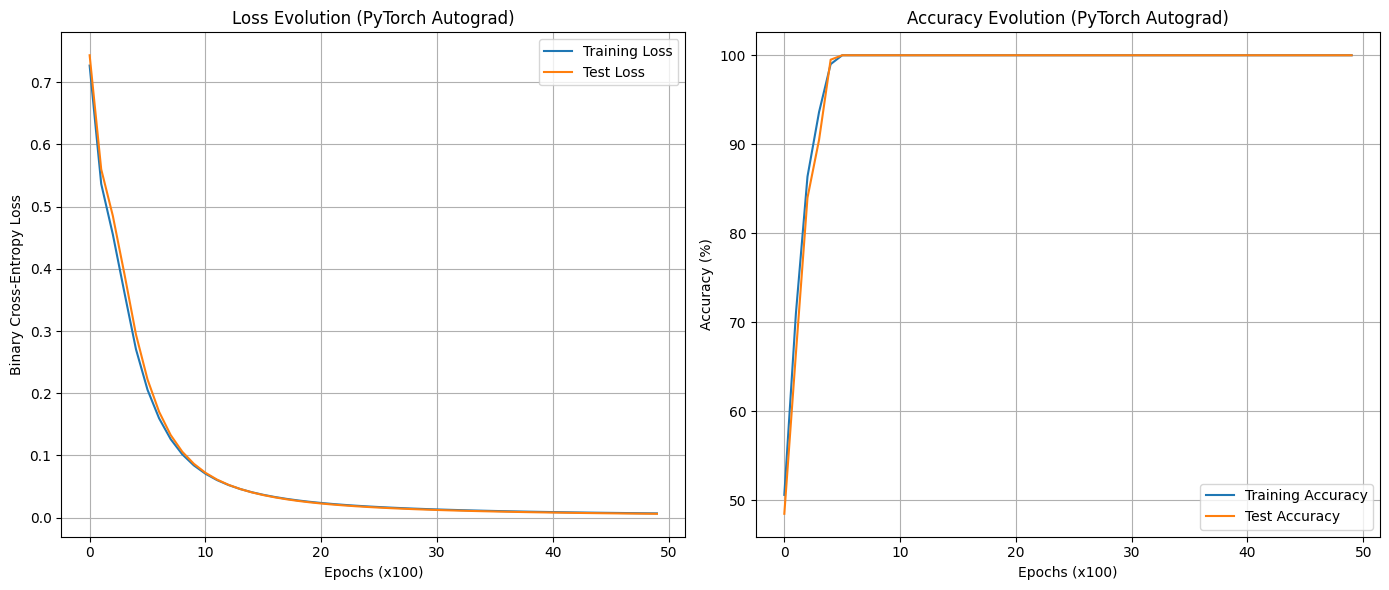

In [ ]:

n_in = X_train_tensor.shape[1]
n_h = 10
n_out = 1
epochs = 5000
learning_rate = 0.1

mlp = C_MultiLayerPerceptron(n_in, n_h, n_out)
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(epochs):



    y_pred_train = mlp.forward(X_train_tensor)


    loss = mlp.compute_loss(y_pred_train, y_train_tensor)


    mlp.backward(loss)


    mlp.step(learning_rate)


    if epoch % 100 == 0:
        with torch.no_grad():
            train_losses.append(loss.item())
            train_preds = (y_pred_train > 0.5).float()
            train_acc = (train_preds == y_train_tensor).float().mean().item()
            train_accuracies.append(train_acc * 100)

            y_pred_test = mlp.forward(X_test_tensor)
            test_loss = mlp.compute_loss(y_pred_test, y_test_tensor)
            test_losses.append(test_loss.item())
            test_preds = (y_pred_test > 0.5).float()
            test_acc = (test_preds == y_test_tensor).float().mean().item()
            test_accuracies.append(test_acc * 100)

            print(f"Epoch {epoch}: Train Loss={loss.item():.4f}, Train Acc={train_acc*100:.2f}%, "
                  f"Test Loss={test_loss.item():.4f}, Test Acc={test_acc*100:.2f}%")



plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss Evolution (PyTorch Autograd)')
plt.xlabel('Epochs (x100)')
plt.ylabel('Binary Cross-Entropy Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy Evolution (PyTorch Autograd)')
plt.xlabel('Epochs (x100)')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import os
import pdb

import sklearn  # scikit-learn
import torch

# import pytorch modules
import torch.nn as nn
import torch.optim as optim
print(torch.__version__)

from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

from tqdm import tqdm

2.6.0+cu124


## 3- Coding a Multi-Layer Perceptron with Pytorch

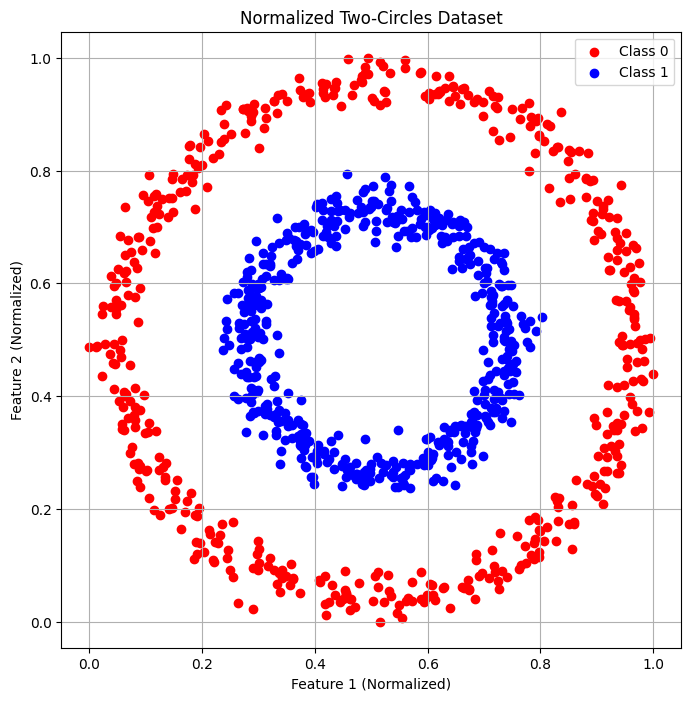

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X, Y = datasets.make_circles(n_samples=1000, noise=0.05, factor=0.5)


scaler = MinMaxScaler()
X = scaler.fit_transform(X)



plt.figure(figsize=(8, 8))
plt.title("Normalized Two-Circles Dataset")
plt.scatter(X[Y==0, 0], X[Y==0, 1], color='r', label='Class 0')
plt.scatter(X[Y==1, 0], X[Y==1, 1], color='b', label='Class 1')
plt.xlabel("Feature 1 (Normalized)")
plt.ylabel("Feature 2 (Normalized)")
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")


X_train shape: (800, 2)
Y_train shape: (800,)
X_test shape: (200, 2)
Y_test shape: (200,)


Finally, we need to create `torch.utils.data.Dataset` objects from these numpy datasets. These datasets are Pytorch objects, which typically implement a `get_item(i)` method which manages the retrieval of the i-th item in the dataset, and return it as a torch `Tensor` object (or tuple thereof).

A useful subclass for us is `TensorDataset`, which does the magic under the hood for us for this simple case where we have data points and labels already available:

In [ ]:
import torch
from torch.utils.data import TensorDataset

training_dataset = TensorDataset(torch.tensor(X_train).float(),
                                 torch.unsqueeze(torch.tensor(Y_train), -1).float())

test_dataset = TensorDataset(torch.tensor(X_test).float(),
                             torch.unsqueeze(torch.tensor(Y_test), -1).float())

print("Sample from training dataset:")
print(training_dataset[0])


Sample from training dataset:
(tensor([0.9585, 0.4921]), tensor([0.]))


We will use the GPU if it is available on your machine, otherwise the CPU. We do so by putting the model and data on the active device with `.to(device)`.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# Creating the MLP with Pytorch : Architecture

We are now going to create an MLP with pytorch. We will start with an MLP with one hidden layer. The network should consist of the following operations, in the following order :

- Fully connected layer (with biases), mapping the input data (2D) to `n_hidden` neurons, using `nn.Linear(...)`
- ReLU activation, using `nn.ReLu()`
- Fully connected layer (with biases), mapping the hidden layer to the output layer with 1 neuron
- Sigmoid output activation, using `nn.Sigmoid()`

We are going to be solving a binary classification problem, so the output of the network should be a scalar between 0 and 1 (thus the last Sigmoid activation function).

In [ ]:
n_input = 2
n_hidden = 50
n_output = 1

In [ ]:
class MLP(nn.Module):

  def __init__(self, n_input, n_hidden, n_output):
    super().__init__()

    self.linear1 = nn.Linear(n_input, n_hidden)
    self.linear2 = nn.Linear(n_hidden, n_output)

  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = torch.sigmoid(self.linear2(x))

    return x

In [ ]:
sequential = True

if sequential:
  model = nn.Sequential(MLP(n_input, n_hidden, n_output))
  sequential = False
else:
  model = MLP(n_input, n_hidden, n_output)

model = model.to(device)

# Training the model

We are now going to train the model itself. First, we need to define model parameters (batch size, number of epochs, etc.). Then we will define the loss, the optimizer and start the training.

In [ ]:
learning_rate = 0.01
n_epochs = 30
batch_size = 64

We will use the binary cross entropy loss from Pytorch. For now, we instantiate an `nn.BCELoss()` object. We will call it during the training on specific outputs $\hat{y}$ and ground truth values $y$.

Use the argument `reduction='sum'` for compatibility with my code below (it corresponds to one of several possible ways to aggregate the individual losses from individual data points).

In [ ]:
criterion = nn.BCELoss(reduction='sum')

We now define the optimizer. We use the Adam optimizer from `optim.Adam`, passing `model.parameters()` as trainable parameters and setting the learning rate to `learning_rate`:

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

Finally, we need to define a `DataLoader`. It takes as input the torch dataset, the batch size, and a number of optional arguments. The dataloader is responsible for creating minibatches for the training (and/or for the inference/test-time).

It is a highly customizable process that relies on a `sampler`. The default sampler (when you do not specify a particular sampler) just samples data points uniformly at random from the full batch to create the minibatch. This default behaviour is very often good enough. We do not worry about this for today and rely on this default behaviour.

In [ ]:
training_loader = DataLoader(training_dataset, batch_size =  batch_size, shuffle = True, drop_last = False)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = False, drop_last = False)

We can now move on to the main training loop. It iterates over the dataset for a number of epochs. Each epoch involves a number of iterations: at each iteration, a minibatch is processed and the iteration culminates in a parameter update.

In [ ]:
def prediction_accuracy(predict, labels):
    preds = (predict > 0.5).astype(float)
    return (preds == labels).mean()

In [ ]:

model.train()


for epoch in range(n_epochs):
    train_loss = 0.0
    all_labels = []
    all_predicted = []

    with tqdm(training_loader, unit="batch") as tepoch:
        for data, labels in tepoch:
            tepoch.set_description(f"Epoch {epoch}")

            data = data.to(device)
            labels = labels.to(device)

            outputs = model(data)

            loss = criterion(outputs, labels)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()
            train_loss += loss.item()

            all_labels.extend(labels.cpu().numpy().flatten())
            all_predicted.extend(outputs.detach().cpu().numpy().flatten())

    avg_train_loss = train_loss / len(training_loader.dataset)
    train_accuracy = prediction_accuracy(np.array(all_predicted), np.array(all_labels))

    print(f'Epoch {epoch}: Train Loss: {avg_train_loss:.4f}')
    print(f'Epoch {epoch}: Train Accuracy: {train_accuracy * 100:.2f}%')


Epoch 0: 100%|██████████| 13/13 [00:00<00:00, 151.90batch/s]


Epoch 0: Train Loss: 0.6880
Epoch 0: Train Accuracy: 49.75%


Epoch 1: 100%|██████████| 13/13 [00:00<00:00, 190.27batch/s]


Epoch 1: Train Loss: 0.6674
Epoch 1: Train Accuracy: 64.25%


Epoch 2: 100%|██████████| 13/13 [00:00<00:00, 272.62batch/s]


Epoch 2: Train Loss: 0.6490
Epoch 2: Train Accuracy: 77.75%


Epoch 3: 100%|██████████| 13/13 [00:00<00:00, 282.62batch/s]


Epoch 3: Train Loss: 0.6269
Epoch 3: Train Accuracy: 77.12%


Epoch 4: 100%|██████████| 13/13 [00:00<00:00, 251.63batch/s]


Epoch 4: Train Loss: 0.5976
Epoch 4: Train Accuracy: 89.38%


Epoch 5: 100%|██████████| 13/13 [00:00<00:00, 280.91batch/s]


Epoch 5: Train Loss: 0.5635
Epoch 5: Train Accuracy: 96.62%


Epoch 6: 100%|██████████| 13/13 [00:00<00:00, 299.21batch/s]


Epoch 6: Train Loss: 0.5250
Epoch 6: Train Accuracy: 100.00%


Epoch 7: 100%|██████████| 13/13 [00:00<00:00, 193.68batch/s]


Epoch 7: Train Loss: 0.4842
Epoch 7: Train Accuracy: 99.88%


Epoch 8: 100%|██████████| 13/13 [00:00<00:00, 152.22batch/s]


Epoch 8: Train Loss: 0.4399
Epoch 8: Train Accuracy: 99.88%


Epoch 9: 100%|██████████| 13/13 [00:00<00:00, 173.64batch/s]


Epoch 9: Train Loss: 0.3995
Epoch 9: Train Accuracy: 99.38%


Epoch 10: 100%|██████████| 13/13 [00:00<00:00, 201.92batch/s]


Epoch 10: Train Loss: 0.3605
Epoch 10: Train Accuracy: 99.75%


Epoch 11: 100%|██████████| 13/13 [00:00<00:00, 187.40batch/s]


Epoch 11: Train Loss: 0.3204
Epoch 11: Train Accuracy: 100.00%


Epoch 12: 100%|██████████| 13/13 [00:00<00:00, 185.76batch/s]


Epoch 12: Train Loss: 0.2847
Epoch 12: Train Accuracy: 100.00%


Epoch 13: 100%|██████████| 13/13 [00:00<00:00, 121.93batch/s]


Epoch 13: Train Loss: 0.2532
Epoch 13: Train Accuracy: 100.00%


Epoch 14: 100%|██████████| 13/13 [00:00<00:00, 188.80batch/s]


Epoch 14: Train Loss: 0.2240
Epoch 14: Train Accuracy: 100.00%


Epoch 15: 100%|██████████| 13/13 [00:00<00:00, 107.54batch/s]


Epoch 15: Train Loss: 0.2002
Epoch 15: Train Accuracy: 100.00%


Epoch 16: 100%|██████████| 13/13 [00:00<00:00, 100.80batch/s]


Epoch 16: Train Loss: 0.1770
Epoch 16: Train Accuracy: 100.00%


Epoch 17: 100%|██████████| 13/13 [00:00<00:00, 104.63batch/s]


Epoch 17: Train Loss: 0.1586
Epoch 17: Train Accuracy: 100.00%


Epoch 18: 100%|██████████| 13/13 [00:00<00:00, 120.93batch/s]


Epoch 18: Train Loss: 0.1413
Epoch 18: Train Accuracy: 100.00%


Epoch 19: 100%|██████████| 13/13 [00:00<00:00, 95.54batch/s]


Epoch 19: Train Loss: 0.1263
Epoch 19: Train Accuracy: 100.00%


Epoch 20: 100%|██████████| 13/13 [00:00<00:00, 154.84batch/s]


Epoch 20: Train Loss: 0.1142
Epoch 20: Train Accuracy: 100.00%


Epoch 21: 100%|██████████| 13/13 [00:00<00:00, 121.17batch/s]


Epoch 21: Train Loss: 0.1043
Epoch 21: Train Accuracy: 100.00%


Epoch 22: 100%|██████████| 13/13 [00:00<00:00, 163.70batch/s]


Epoch 22: Train Loss: 0.0939
Epoch 22: Train Accuracy: 100.00%


Epoch 23: 100%|██████████| 13/13 [00:00<00:00, 103.70batch/s]


Epoch 23: Train Loss: 0.0849
Epoch 23: Train Accuracy: 100.00%


Epoch 24: 100%|██████████| 13/13 [00:00<00:00, 93.90batch/s]


Epoch 24: Train Loss: 0.0782
Epoch 24: Train Accuracy: 100.00%


Epoch 25: 100%|██████████| 13/13 [00:00<00:00, 75.32batch/s]


Epoch 25: Train Loss: 0.0711
Epoch 25: Train Accuracy: 100.00%


Epoch 26: 100%|██████████| 13/13 [00:00<00:00, 75.05batch/s]


Epoch 26: Train Loss: 0.0652
Epoch 26: Train Accuracy: 100.00%


Epoch 27: 100%|██████████| 13/13 [00:00<00:00, 58.32batch/s]


Epoch 27: Train Loss: 0.0600
Epoch 27: Train Accuracy: 100.00%


Epoch 28: 100%|██████████| 13/13 [00:00<00:00, 77.04batch/s] 


Epoch 28: Train Loss: 0.0561
Epoch 28: Train Accuracy: 100.00%


Epoch 29: 100%|██████████| 13/13 [00:00<00:00, 118.05batch/s]

Epoch 29: Train Loss: 0.0521
Epoch 29: Train Accuracy: 100.00%


# Testing the model

Let us now visualize the decision function and compute the test accuracy for the model.

In [ ]:
model.eval()

all_predicted = []
all_labels = []

with tqdm(test_loader, unit="batch") as tepoch:
  for data, labels in tepoch:
    all_labels.extend(labels.tolist())

    data = data.to(device)
    y_predict = model(data)
    all_predicted.extend((y_predict>=0.5).tolist())

test_accuracy = prediction_accuracy(np.array(all_predicted),np.array(all_labels))

print("\nTest Accuracy:", test_accuracy)

100%|██████████| 4/4 [00:00<00:00, 748.41batch/s]


Test Accuracy: 1.0


Here is a function that shows the decision boundary of our network. This works only for 2D input data:

In [ ]:


def plot_decision_function_2d(model, X, Y):
    h = .02
    offset = 0.1
    x_min, x_max = X[:, 0].min() - offset, X[:, 0].max() + offset
    y_min, y_max = X[:, 1].min() - offset, X[:, 1].max() + offset
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model(torch.tensor(np.c_[xx.ravel(), yy.ravel()]).float().to(device)).detach().cpu().numpy()
    Z = Z<0.5

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.plot(X[Y == 1, 0], X[Y == 1, 1], 'yo')
    plt.plot(X[Y == 0, 0], X[Y == 0, 1], 'ko')

    plt.title("Decision surface")
    plt.axis('tight')

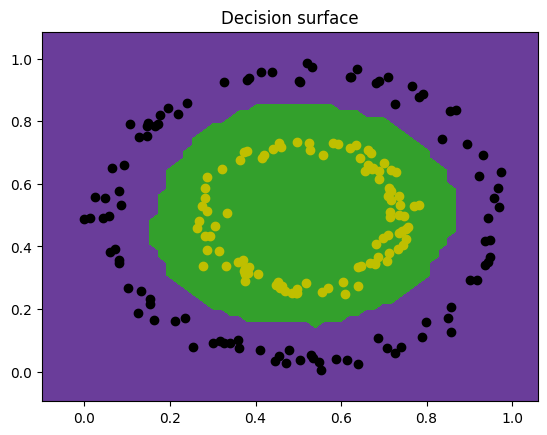

In [ ]:
plot_decision_function_2d(model, X_test, Y_test)

# 4 - MLP with several hidden layers, on MNIST

We are now going to create an MLP with several hidden layers. We are going to use a more complicated dataset : the MNIST dataset, which contains images of handwritten digits. There are 10 classes, one for each digit.

We are going to implement the following architecture :

- Fully connected layer, mapping from `n_input` to `n_hidden_1` neurons
- Relu activation
- Fully connected layer, mapping from `n_hidden_1` to `n_hidden_2` neurons
- Relu activation
- Fully connected layer, mapping from `n_hidden_2` to `n_hidden_3` neurons
- Relu activation
- Fully connected layer, mapping from `n_hidden_3` to `n_output` (=10) neurons

__IMPORTANT Note__ The sigmoid layer has been removed. Ideally, we should have replaced it by a softmax layer (at the end) since we have a multi-class problem. However, this softmax activation is already present in the loss ```nn.CrossEntropyLoss()```. This is why we don't have to put one here. The unnormalized outputs before this softmax are called logits. Hence, the network outputs logits.

In [ ]:

import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)),
])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

# You can check the shape of a single data point
print(f"Shape of one training image: {trainset[0][0].shape}")
print(f"Label of one training image: {trainset[0][1]}")


Shape of one training image: torch.Size([1, 28, 28])
Label of one training image: 5


Note that here, we have defined transforms and passed them as argument when creating the dataset. These transforms will be called systematically in the `get_item` method implemented in the dataset, modifying each image before returning it. Here we use this tool to format and normalize input images.

The same process could be used to apply random augmentations to the input images (for data augmentations), by composing with functions that apply random transforms.

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


MLP architecture, via sequential API:

In [ ]:
n_hidden_1 = 256 
n_hidden_2 = 256 
n_hidden_3 = 128 


n_input = 784
n_output = 10

In [ ]:

model_multi_layer = nn.Sequential(
    nn.Flatten(),
    nn.Linear(n_input, n_hidden_1),
    nn.ReLU(),
    nn.Linear(n_hidden_1, n_hidden_2),
    nn.ReLU(),
    nn.Linear(n_hidden_2, n_hidden_3),
    nn.ReLU(),
    nn.Linear(n_hidden_3, n_output)
)

In [ ]:
model_multi_layer = model_multi_layer.to(device)
print(model_multi_layer)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): ReLU()
  (3): Linear(in_features=256, out_features=256, bias=True)
  (4): ReLU()
  (5): Linear(in_features=256, out_features=128, bias=True)
  (6): ReLU()
  (7): Linear(in_features=128, out_features=10, bias=True)
)


Let us move on to the training. You need to define the loss using the instructions above, and the optimizer as usual. For the loss, use the argument `reduction='sum'` as before for compatibility with my code.

In [ ]:
learning_rate = 0.01
n_epochs = 20
batch_size = 64

In [ ]:
criterion = nn.CrossEntropyLoss(reduction='sum')
optimizer = optim.Adam(model_multi_layer.parameters(), lr=learning_rate)

In [ ]:
training_loader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(testset, batch_size=batch_size, shuffle=False)

Now comes the main loop for the training and testing:

In [ ]:
from tqdm import tqdm
import numpy as np

def vector_to_class(x):
    """Converts a batch of logit vectors to a batch of predicted class indices."""
    return torch.max(x, 1)[1]

def prediction_accuracy(predict, labels):
    """Calculates accuracy for a batch of predictions and labels."""
    correct = (predict == labels).sum().item()
    total = len(labels)
    return correct / total

Train the model.

In [ ]:
model_multi_layer.train()

for epoch in range(n_epochs):
    train_loss = 0.0
    train_correct = 0
    train_total = 0

    with tqdm(training_loader, unit="batch") as tepoch:
        for data, labels in tepoch:
            tepoch.set_description(f"Epoch {epoch}")

            data, labels = data.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model_multi_layer(data)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

            predicted_classes = vector_to_class(outputs)
            train_total += labels.size(0)
            train_correct += (predicted_classes == labels).sum().item()

            tepoch.set_postfix(loss=train_loss/train_total, accuracy=100. * train_correct/train_total)

    avg_train_loss = train_loss / len(training_loader.dataset)
    avg_train_acc = train_correct / train_total
    print(f"Epoch {epoch}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {avg_train_acc*100:.2f}%")

Epoch 0: 100%|██████████| 938/938 [00:29<00:00, 32.04batch/s, accuracy=86.3, loss=0.444]


Epoch 0: Train Loss: 0.4437, Train Accuracy: 86.28%


Epoch 1: 100%|██████████| 938/938 [00:32<00:00, 28.56batch/s, accuracy=91.9, loss=0.282]


Epoch 1: Train Loss: 0.2816, Train Accuracy: 91.91%


Epoch 2: 100%|██████████| 938/938 [00:31<00:00, 29.42batch/s, accuracy=93, loss=0.251]


Epoch 2: Train Loss: 0.2511, Train Accuracy: 92.97%


Epoch 3: 100%|██████████| 938/938 [00:32<00:00, 28.79batch/s, accuracy=93, loss=0.256]


Epoch 3: Train Loss: 0.2564, Train Accuracy: 92.98%


Epoch 4: 100%|██████████| 938/938 [00:31<00:00, 29.42batch/s, accuracy=93.7, loss=0.235]


Epoch 4: Train Loss: 0.2353, Train Accuracy: 93.73%


Epoch 5: 100%|██████████| 938/938 [00:32<00:00, 28.79batch/s, accuracy=94.1, loss=0.226]


Epoch 5: Train Loss: 0.2256, Train Accuracy: 94.14%


Epoch 6: 100%|██████████| 938/938 [00:31<00:00, 29.43batch/s, accuracy=94.1, loss=0.23]


Epoch 6: Train Loss: 0.2299, Train Accuracy: 94.07%


Epoch 7: 100%|██████████| 938/938 [00:32<00:00, 28.97batch/s, accuracy=94.4, loss=0.218]


Epoch 7: Train Loss: 0.2180, Train Accuracy: 94.45%


Epoch 8: 100%|██████████| 938/938 [00:32<00:00, 29.19batch/s, accuracy=94.2, loss=0.23]


Epoch 8: Train Loss: 0.2298, Train Accuracy: 94.23%


Epoch 9: 100%|██████████| 938/938 [00:32<00:00, 28.86batch/s, accuracy=94.4, loss=0.214]


Epoch 9: Train Loss: 0.2143, Train Accuracy: 94.44%


Epoch 10: 100%|██████████| 938/938 [00:32<00:00, 29.06batch/s, accuracy=94.7, loss=0.217]


Epoch 10: Train Loss: 0.2171, Train Accuracy: 94.66%


Epoch 11: 100%|██████████| 938/938 [00:32<00:00, 28.96batch/s, accuracy=94.9, loss=0.2]


Epoch 11: Train Loss: 0.2001, Train Accuracy: 94.93%


Epoch 12: 100%|██████████| 938/938 [00:32<00:00, 28.90batch/s, accuracy=94.9, loss=0.201]


Epoch 12: Train Loss: 0.2014, Train Accuracy: 94.91%


Epoch 13: 100%|██████████| 938/938 [00:32<00:00, 29.21batch/s, accuracy=94.5, loss=0.214]


Epoch 13: Train Loss: 0.2136, Train Accuracy: 94.52%


Epoch 14: 100%|██████████| 938/938 [00:32<00:00, 28.54batch/s, accuracy=95.2, loss=0.197]


Epoch 14: Train Loss: 0.1967, Train Accuracy: 95.18%


Epoch 15: 100%|██████████| 938/938 [00:32<00:00, 29.29batch/s, accuracy=95.2, loss=0.196]


Epoch 15: Train Loss: 0.1956, Train Accuracy: 95.18%


Epoch 16: 100%|██████████| 938/938 [00:33<00:00, 28.37batch/s, accuracy=95.3, loss=0.191]


Epoch 16: Train Loss: 0.1911, Train Accuracy: 95.28%


Epoch 17: 100%|██████████| 938/938 [00:31<00:00, 29.32batch/s, accuracy=94.7, loss=0.227]


Epoch 17: Train Loss: 0.2272, Train Accuracy: 94.66%


Epoch 18: 100%|██████████| 938/938 [00:32<00:00, 28.53batch/s, accuracy=95.5, loss=0.179]


Epoch 18: Train Loss: 0.1788, Train Accuracy: 95.50%


Epoch 19: 100%|██████████| 938/938 [00:32<00:00, 29.18batch/s, accuracy=95.4, loss=0.193]

Epoch 19: Train Loss: 0.1934, Train Accuracy: 95.41%


Testing:

In [ ]:
model_multi_layer.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for data, labels in test_loader:
        data, labels = data.to(device), labels.to(device)
        outputs = model_multi_layer(data)
        predicted_classes = vector_to_class(outputs)
        test_total += labels.size(0)
        test_correct += (predicted_classes == labels).sum().item()

test_accuracy = test_correct / test_total
print(f'Final Test Accuracy: {test_accuracy * 100:.2f}%')

Final Test Accuracy: 95.31%


We visualize a few images along with the predicted label on top:

In [ ]:
import matplotlib.pyplot as plt

def test_mnist_images(model, testset):
    """Visualizes model predictions on a few test images."""
    model.eval()
    plt.figure(figsize=(10, 10))

    for i in range(16):
        image, label = testset[i]

        image_for_plot = image.reshape(28, 28)

        image_for_model = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(image_for_model)
            prediction = vector_to_class(output).item()

        plt.subplot(4, 4, i + 1)
        plt.imshow(image_for_plot, cmap='gray')
        plt.title(f"Pred: {prediction}, True: {label}", color=("green" if prediction == label else "red"))
        plt.axis('off')

    plt.tight_layout()
    plt.show()

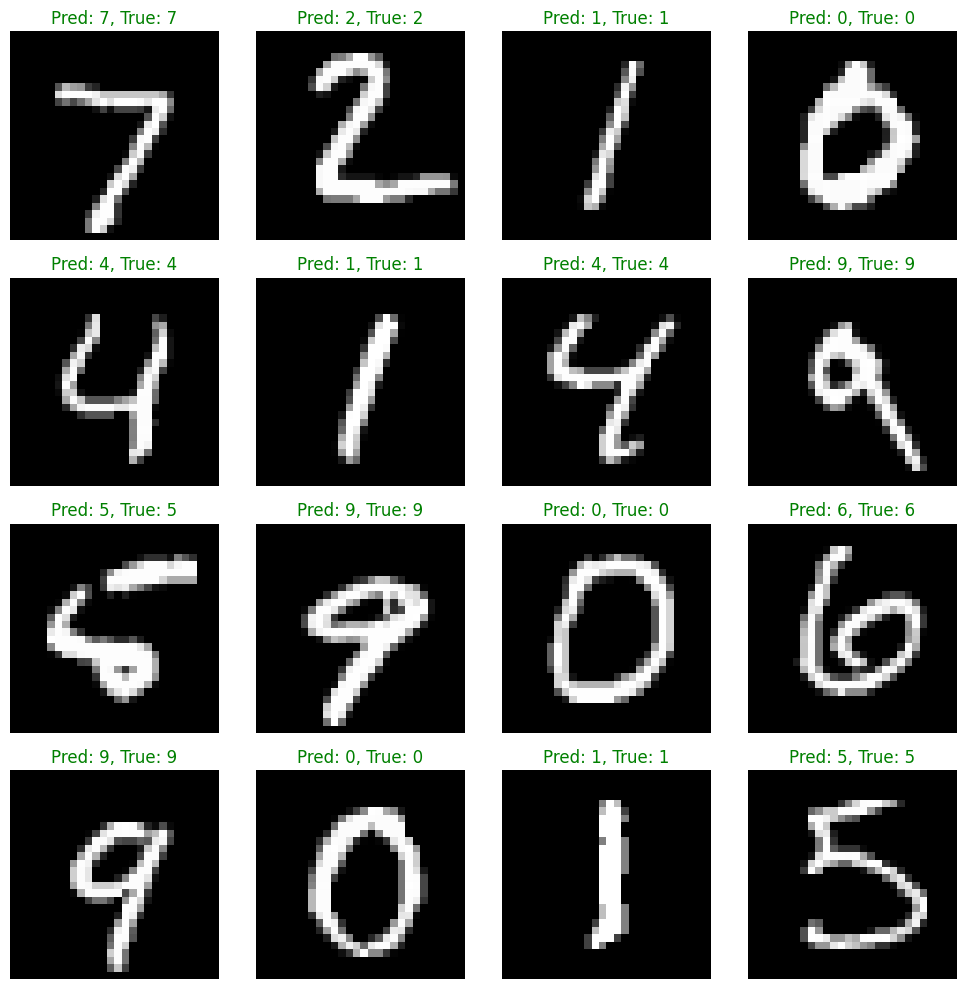

In [ ]:
test_mnist_images(model_multi_layer, testset)